In [49]:
import os
import json
import shutil

In [349]:
pth = os.path.join(os.path.expanduser("~/"), "bundestag")
files = [os.path.join(pth, f) for f in os.listdir(pth) if os.path.isfile(os.path.join(pth, f))]

In [51]:
len(files), files[:2]

(413,
 ['/home/ubuntu/bundestag/17236.json', '/home/ubuntu/bundestag/17111.json'])

In [352]:
!mkdir ../bundestag/unravelled

In [353]:
speakers = set()
for f in files:
    if (os.path.isdir(f)):
        continue
    with open(f) as fh, open(os.path.join(pth, "unravelled", os.path.basename(f)), 'w') as fh_out:
        docs = json.load(fh)
        for d in docs:
            speakers.add((d['speaker_fp'], d['speaker_party']))
            s = json.dumps(d, fh_out)
            fh_out.write(s)
            fh_out.write('\n')

In [354]:
next(iter(speakers))

('thomas-koenigs', 'gruene')

In [355]:
len(speakers)

3665

In [356]:
len(docs)

1363

In [357]:
docs[0]

{'filename': 'data/txt/17170.txt',
 'in_writing': False,
 'sequence': 1362,
 'sitzung': 170,
 'speaker': 'Jörg von Polheim (FDP)',
 'speaker_cleaned': 'Jörg von Polheim',
 'speaker_fp': 'jorg-polheim',
 'speaker_party': 'fdp',
 'text': '',
 'type': 'speech',
 'wahlperiode': 17}

In [418]:
import dask.bag as db
import json

records = db.read_text('../bundestag/unravelled/*.json').map(json.loads)

In [441]:
records = db.read_text('../bundestag/unravelled/*.json').map(json.loads)
g = records.pluck('speaker_fp').distinct()
g.visualize(optimize_graph=False, format='pdf')

[dask graph](mydask.pdf)

In [443]:
records.filter(lambda d: d['type'] == 'speech')\
    .pluck('text').map(len)\
    .mean().visualize(filename='dask2', optimize_graph=False, format='pdf')

[dask graph](dask2.pdf.pdf)

In [359]:
len(records.pluck('speaker_fp').distinct().compute())

3548

In [360]:
len(records.filter(lambda d: d['type'] == 'speech').pluck('speaker_fp').distinct().compute())

3364

In [361]:
len(records.pluck('speaker_party').distinct().compute())

22

In [363]:
records.filter(lambda d: d['type'] == 'speech').take(1)

({'filename': 'data/txt/17001.txt',
  'in_writing': False,
  'sequence': 165,
  'sitzung': 1,
  'speaker': 'Katrin Göring-Eckardt (BÜNDNIS 90/DIE GRÜNEN)',
  'speaker_cleaned': 'Katrin Göring-Eckardt',
  'speaker_fp': 'katrin-goring-eckardt',
  'speaker_party': 'gruene',
  'text': '',
  'type': 'speech',
  'wahlperiode': 17},)

-----

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(64, input_dim=70, init='uniform'))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(64, init='uniform'))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(10, init='uniform'))
model.add(Activation('softmax'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

Using Theano backend.


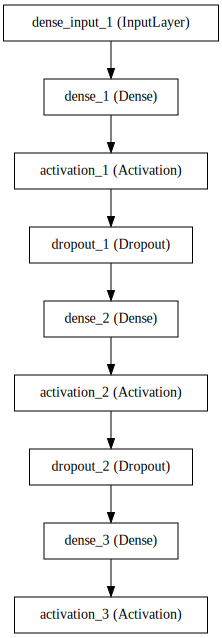

In [4]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [57]:
model.fit(X_train, y_train,
          nb_epoch=20,
          batch_size=16)
score = model.evaluate(X_test, y_test, batch_size=16)

NameError: name 'X_train' is not defined

---
---

In [461]:
from keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=5000)

65511424/65552540 [============================>.] - ETA: 0s

In [465]:
len(X_train), len(X_train[0]), len(X_train[1])

(25000, 218, 189)

In [466]:
from keras.preprocessing import sequence

In [467]:
X_train = sequence.pad_sequences(X_train, maxlen=400)
X_test = sequence.pad_sequences(X_test, maxlen=400)

In [469]:
len(X_train[0]), len(X_train[1])

(400, 400)

In [471]:
from keras.layers import Embedding
from keras.layers import Convolution1D, MaxPooling1D

In [470]:
model = Sequential()
model.add(Embedding(5000, 50, input_length=400, dropout=0.2))

---
---

In [47]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution1D
from keras.layers.pooling import MaxPooling1D
from keras.layers.core import Dense, Flatten, Dropout

In [455]:
model = Sequential()
model.add(Convolution1D(256, 7, border_mode='same', input_length=1014, input_dim=132))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_length=3, stride=1, border_mode='valid'))

model.add(Convolution1D(256, 7, border_mode='same', input_dim=132))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_length=3, stride=1, border_mode='valid'))

model.add(Convolution1D(256, 3, border_mode='same', input_dim=132))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_length=3, stride=1, border_mode='valid'))

model.add(Convolution1D(256, 3, border_mode='same', input_dim=132))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_length=3, stride=1, border_mode='valid'))

model.add(Convolution1D(256, 3, border_mode='same', input_dim=132))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_length=3, stride=1, border_mode='valid'))

model.add(Convolution1D(256, 3, border_mode='same', input_dim=132))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_length=3, stride=1, border_mode='valid'))

In [457]:
model.add(Flatten())

In [458]:
model.add(Dense(1024, init='normal', input_dim=
    activation='relu', weights=None, W_regularizer=None,
    b_regularizer=None, activity_regularizer=None, W_constraint=None,
    b_constraint=None, bias=True))

model.add(Dropout(0.5))

model.add(Dense(1024, init='normal',
    activation='relu', weights=None, W_regularizer=None,
    b_regularizer=None, activity_regularizer=None, W_constraint=None,
    b_constraint=None, bias=True))

model.add(Dropout(0.5))

n_classes = len(records.pluck('speaker_party').distinct().compute())
model.add(Dense(n_classes, input_dim=256, init='normal',
    activation='softmax', weights=None, W_regularizer=None,
    b_regularizer=None, activity_regularizer=None, W_constraint=None,
    b_constraint=None, bias=True))

In [459]:
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

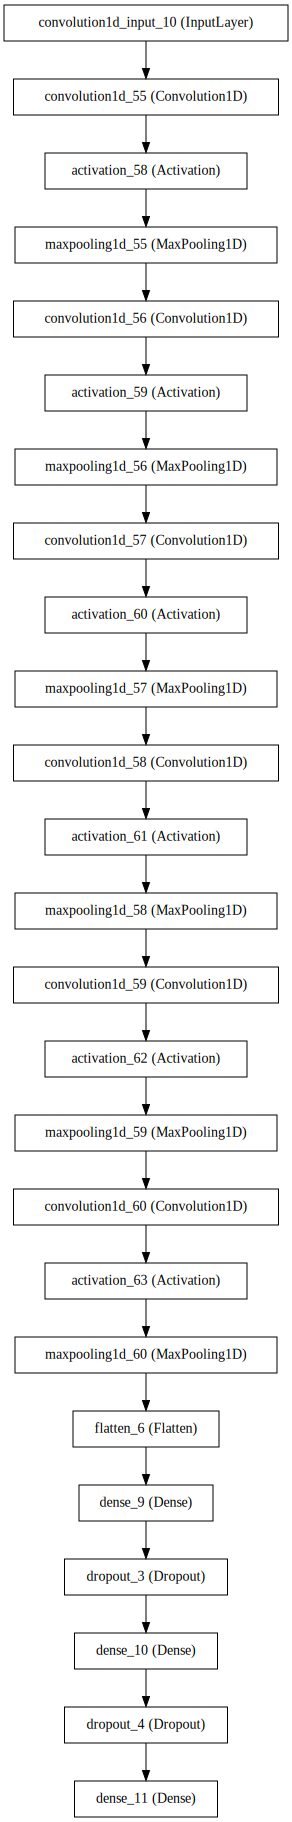

In [64]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

----

In [364]:
%matplotlib inline

In [365]:
import re
import pandas as pd
import seaborn as sns

In [376]:
def preprocess(d):
    text = d['text'].lower()
    text = re.sub('\s+', ' ', text)
    d['text'] = text
    return d

In [377]:
records = db.read_text('../bundestag/unravelled/*.json').map(json.loads)
speeches = records.filter(lambda d: d['type'] == 'speech').filter(lambda d: d['text'] != '').map(preprocess)

In [378]:
speeches.take(1)

({'filename': 'data/txt/17001.txt',
  'in_writing': False,
  'sequence': 163,
  'sitzung': 1,
  'speaker': 'Katrin Göring-Eckardt (BÜNDNIS 90/DIE GRÜNEN)',
  'speaker_cleaned': 'Katrin Göring-Eckardt',
  'speaker_fp': 'katrin-goring-eckardt',
  'speaker_party': 'gruene',
  'text': 'ich nehme die wahl an und bedanke mich sehr herzlich.',
  'type': 'speech',
  'wahlperiode': 17},)

In [379]:
texts = ' '.join(speeches.pluck('text').compute())
char_freq = pd.DataFrame([{'char': k, 'count': texts.count(k)} for k in set(texts)])

In [380]:
char_freq.shape

(132, 2)

In [381]:
char_freq['probability'] = char_freq['count'] / char_freq['count'].sum()

In [382]:
char_freq.sort_values('count', ascending=False).head()

,char,count,probability
43,,24595626,0.142090
122,e,23286313,0.134526
28,n,15130883,0.087412
123,i,12112309,0.069973
45,r,10461510,0.060437


In [383]:
char_freq.sort_values('count', ascending=False).tail()

,char,count,probability
7,û,1,5.777037e-09
100,,1,5.777037e-09
103,,1,5.777037e-09
104,,1,5.777037e-09
44,,1,5.777037e-09


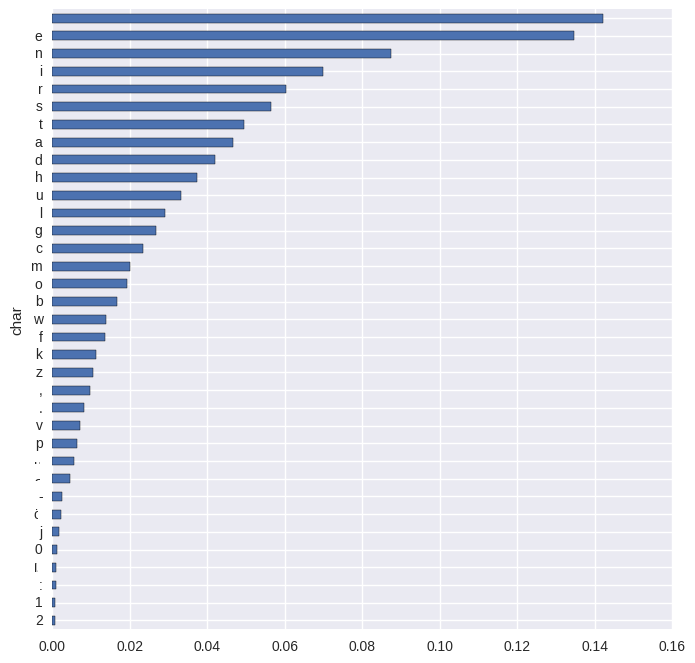

In [385]:
_ = char_freq.set_index('char').sort_values('count')['probability'].tail(35).plot(kind='barh', figsize=(8, 8))

In [386]:
chars = list(char_freq['char'].values)

In [407]:
len(chars)

132

In [387]:
import numpy as np

from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [388]:
vocabulary = {c: i for i, c in enumerate(chars)}

In [389]:
def quantize(document, vocabulary, max_entries_per_document=1014):
    output = np.zeros((max_entries_per_document, len(vocabulary)))
    for i in range(min(len(document), 1014)):
        output[i, vocabulary[document[i]]] = 1
    return output.flatten()

In [390]:
labels = [l if l is not None else 'n/a' for l in speeches.pluck('speaker_party').distinct().compute()]

In [391]:
labels

['cducsu:spd',
 'n/a',
 'spd',
 'gruene',
 'fdp',
 'fdp:gruene',
 'cducsu:fdp',
 'cducsu',
 'linke']

In [392]:
label_encoder.transform(['linke'])

array([6])

In [393]:
label_encoder = LabelEncoder()
label_encoder.fit(labels)

def transform_data(json_docs, vocabulary, x_field='text', y_field='speaker_party'):
    for d in json_docs:
        yield label_encoder.transform([d[y_field]]), quantize(d[x_field], vocabulary)

In [396]:
docs = speeches.take(1)

In [397]:
docs

({'filename': 'data/txt/17001.txt',
  'in_writing': False,
  'sequence': 163,
  'sitzung': 1,
  'speaker': 'Katrin Göring-Eckardt (BÜNDNIS 90/DIE GRÜNEN)',
  'speaker_cleaned': 'Katrin Göring-Eckardt',
  'speaker_fp': 'katrin-goring-eckardt',
  'speaker_party': 'gruene',
  'text': 'ich nehme die wahl an und bedanke mich sehr herzlich.',
  'type': 'speech',
  'wahlperiode': 17},)

In [412]:
y, X = next(iter(transform_data(speeches.take(15, npartitions=5), vocabulary)))

In [404]:
y

array([5])

In [415]:
X.reshape(1014, len(chars))

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [460]:
model.fit(X.reshape(-1, 1014, len(chars)), y,
          nb_epoch=20,
          batch_size=16)
score = model.evaluate(X_test, y_test, batch_size=16)

Exception: Error when checking model target: expected dense_21 to have shape (None, 22) but got array with shape (1, 1)